In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [60]:
# To read in fatalities
url3='https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx'
fatal = pd.read_excel(url3, sheet_name='Fatalities by County', skiprows=2)
fatal=fatal.truncate(before=0,after=253)
fatal.keys()
fatal=fatal.set_index("County Name")

from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
fatalDates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in fatal.keys()]  
fatal.columns=[pattern.findall(sub)[0]for sub in fatal.keys()]
fatal.index=fatal.index.str.title() # This is for all uppercase letters in index names

fatal = fatal.T.copy()

fatal

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Borden,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-25,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,277.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-26,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,278.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-27,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,278.0,52.0,0.0,24.0,2.0,50.0,144.0,26.0,4.0,14.0,25.0,5.0,6.0,6.0,16.0
09-28,32.0,9.0,83.0,18.0,1.0,1.0,32.0,9.0,5.0,8.0,30.0,1.0,34.0,86.0,1313.0,5.0,0.0,6.0,53.0,167.0,64.0,4.0,1.0,22.0,25.0,6.0,12.0,35.0,8.0,3.0,912.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,721.0,56.0,0.0,4.0,2.0,28.0,69.0,419.0,7.0

In [81]:
#Read in cases
import pandas as pd
url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx" #  sheets 'COVID-19 Cases', 'COVID-19 Fatalities'
df = pd.read_excel(url , sheet_name = 'Cases by County',skiprows=2)
df=df.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
df2 = df.set_index('County Name')
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in df2.keys()]   
df3 = df2
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
df3.columns=[pattern.findall(sub)[0] for sub in df3.keys()]
cases=df3.T.copy()
cases

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Borden,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-26,2840.0,425.0,2144.0,323.0,87.0,13.0,1144.0,499.0,219.0,157.0,1818.0,19.0,1814.0,5473.0,44347.0,144.0,1.0,323.0,1370.0,11281.0,6292.0,218.0,12.0,317.0,570.0,338.0,729.0,1523.0,821.0,88.0,22698.0,355.0,23.0,370.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45431.0,1485.0,3.0,242.0,8.0,1458.0,2241.0,29073.0,196.0,216.0,387.0,25.0,781.0,2168.0,586.0,4046.0,3701.0,855.0,128.0,638.0,13651.0,1364.0,48.0,1741.0,188.0,1213.0,8565.0,892.0,118.0,760.0,525.0,224.0,314.0,333.0,357.0
09-27,2840.0,425.0,2144.0,323.0,87.0,13.0,1144.0,499.0,219.0,157.0,1818.0,19.0,1814.0,5473.0,44416.0,144.0,1.0,324.0,1370.0,11281.0,6332.0,218.0,12.0,317.0,570.0,338.0,729.0,1523.0,821.0,88.0,22698.0,355.0,23.0,370.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45671.0,1485.0,3.0,242.0,8.0,1458.0,2253.0,29130.0,196.0,216.0,387.0,25.0,783.0,2186.0,586.0,4046.0,3709.0,856.0,128.0,640.0,13686.0,1364.0,48.0,1741.0,188.0,1214.0,8565.0,892.0,118.0,760.0,525.0,224.0,314.0,333.0,357.0
09-28,2840.0,425.0,2144.0,323.0,87.0,13.0,1234.0,499.0,219.0,176.0,1818.0,19.0,1820.0,5473.0,46829.0,144.0,1.0,324.0,1377.0,11395.0,6332.0,218.0,12.0,317.0,570.0,339.0,729.0,1523.0,842.0,88.0,22698.0,355.0,23.0,372.0,257.0,1309.0,1547.0,69.0,90.0,52.0,...,134.0,5.0,14.0,81.0,109.0,45851.0,1485.0,3.0,242.0,8.0,1459.0,2257.0,29252.0,196.0,216.0,389.0,25.0,785.0,2186.0,586.0,4046.0,3709.0,85

In [5]:
# read in ICU data
icu = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 ICU', skiprows=2)
icu = icu.truncate(before=0, after=21)
icu

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,...,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29
0,A.,Amarillo,4.0,5.0,5.0,2.0,6.0,9.0,5.0,10.0,6.0,6.0,21.0,21.0,17.0,19.0,26.0,29.0,34.0,39.0,37.0,37.0,40.0,47.0,44.0,41.0,40.0,51.0,48.0,46.0,43.0,43.0,43.0,36.0,35.0,31.0,33.0,30.0,24.0,22.0,...,22.0,20.0,21.0,21.0,20.0,19.0,20.0,18.0,18.0,16.0,16.0,16.0,17.0,19.0,19.0,21.0,21.0,21.0,21.0,21.0,23.0,22.0,23.0,22.0,31.0,34.0,35.0,35.0,31.0,35.0,28.0,28.0,34.0,33.0,28.0,32.0,32.0,32.0,32.0,32.0
1,B.,Lubbock,12.0,12.0,14.0,15.0,14.0,17.0,16.0,18.0,17.0,19.0,15.0,15.0,15.0,18.0,18.0,18.0,16.0,19.0,30.0,28.0,26.0,24.0,24.0,26.0,24.0,20.0,17.0,15.0,14.0,13.0,15.0,13.0,15.0,14.0,16.0,14.0,13.0,12.0,...,35.0,39.0,37.0,37.0,41.0,40.0,37.0,36.0,31.0,30.0,27.0,26.0,27.0,25.0,22.0,26.0,26.0,25.0,29.0,31.0,36.0,39.0,37.0,34.0,39.0,40.0,40.0,33.0,34.0,40.0,39.0,40.0,42.0,38.0,39.0,39.0,39.0,43.0,44.0,44.0
2,C.,Wichita Falls,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,15.0,6.0,19.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,4.0,6.0,6.0,6.0,8.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,7.0,7.0,7.0,5.0,4.0,3.0,5.0
3,D.,Abilene,2.0,3.0,0.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,20.0,26.0,10.0,27.0,16.0,15.0,15.0,13.0,14.0,13.0,15.0,15.0,18.0,19.0,15.0,14.0,12.0,13.0,12.0,12.0,12.0,9.0,9.0,12.0,13.0,13.0,13.0,13.0,13.0,9.0,5.0,5.0,6.0,6.0,6.0,4.0,6.0,9.0,10.0,6.0
4,E.,Dallas/Ft. Worth,161.0,256.0,150.0,215.0,224.0,221.0,190.0,196.0,188.0,172.0,183.0,199.0,204.0,188.0,179.0,188.0,220.0,247.0,225.0,245.0,250.0,198.0,172.0,235.0,253.0,253.0,243.0,239.0,219.0,190.0,231.0,234.0,248.0,253.0,246.0,203.0,204.0,234.0,...,299.0,314.0,310.0,315.0,300.0,306.0,295.0,300.0,285.0,289.0,285.0,272.0,273.0,251.0,227.0,267.0,247.0,240.0,239.0,234.0,234.0,215.0,210.0,215.0,221.0,195.0,204.0,215.0,208.0,201.0,206.0,194.0,194.0,194.0,201.0,209.0,226.0,216.0,209.0,220.0
5,F.,Paris,12.0,11.0,9.0,8.0,7.0,7.0,8.0,9.0,9.0,10.0,10.0,9.0,10.0,9.0,11.0,11.0,8.0,7.0,8.0,10.0,9.0,7.0,5.0,3.0,4.0,6.0,5.0,5.0,7.0,9.0,7.0,5.0,6.0,7.0,8.0,8.0,9.0,6.0,...,61.0,57.0,24.0,57.0,25.0,25.0,23.0,24.0,21.0,29.0,31.0,29.0,31.0,29.0,29.0,33.0,29.0,27.0,31.0,30.0,29.0,30.0,26.0,26.0,29.0,27.0,26.0,28.0,24.0,31.0,32.0,38.0,46.0,44.0,41.0,43.0,40.0,40.0,40.0,39.0
6,G.,Longview/Tyler,16.0,13.0,17.0,18.0,17.0,17.0,14.0,16.0,20.0,18.0,28.0,21.0,22.0,23.0,23.0,24.0,22.0,22.0,20.0,25.0,26.0,34.0,26.0,22.0,24.0,21.0,19.0,24.0,22.0,21.0,23.0,20.0,21.0,25.0,21.0,17.0,16.0,16.0,...,62.0,63.0,65.0,67.0,67.0,65.0,66.0,67.0,65.0,66.0,69.0,71.0,71.0,73.0,74.0,69.0,65.0,69.0,65.0,63.0,64.0,63.0,62.0,59.0,63.0,64.0,64.0,63.0,65.0,62.0,59.0,53.0,48.0,50.0,49.0,48.0,51.0,52.0,56.0,59.0
7,H.,Lufkin,5.0,4.0,5.0,2.0,7.0,5.0,15.0,10.0,9.0,9.0,8.0,8.0,6.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,3.0,6.0,3.0,6.0,2.0,11.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,...,21.0,21.0,22.0,19.0,21.0,16.0,23.0,21.0,21.0,16.0,19.0,20.0,21.0,20.0,19.0,22.0,20.0,18.0,14.0,23.0,20.0,19.0,17.0,15.0,17.0,18.0,16.0,12.0,17.0,10.0,14.0,26.0,23.0,2

In [99]:
# read in hospitalization 
hosp = pd.read_excel("https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)
#hosp=hosp.T.copy()
hosp

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,...,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
0,A.,Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,17.0,17.0,41.0,41.0,40.0,46.0,59.0,64.0,67.0,82.0,84.0,87.0,91.0,101.0,94.0,90.0,96.0,109.0,112.0,109.0,103.0,98.0,94.0,82.0,84.0,79.0,80.0,72.0,68.0,70.0,...,56.0,61.0,59.0,55.0,51.0,49.0,51.0,49.0,47.0,47.0,46.0,48.0,51.0,54.0,55.0,56.0,57.0,54.0,53.0,47.0,44.0,42.0,46.0,68.0,72.0,70.0,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0,83.0,84.0,82.0,82.0
1,B.,Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,32.0,46.0,28.0,25.0,27.0,32.0,26.0,29.0,29.0,31.0,38.0,36.0,37.0,29.0,30.0,33.0,37.0,32.0,28.0,27.0,25.0,23.0,25.0,19.0,22.0,21.0,20.0,19.0,20.0,21.0,...,85.0,80.0,81.0,83.0,80.0,82.0,78.0,86.0,82.0,87.0,85.0,89.0,82.0,76.0,75.0,64.0,66.0,70.0,68.0,85.0,81.0,83.0,84.0,90.0,86.0,84.0,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0,118.0,115.0,117.0,118.0
2,C.,Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,45.0,35.0,41.0,26.0,23.0,24.0,27.0,21.0,24.0,22.0,29.0,28.0,29.0,25.0,24.0,26.0,29.0,26.0,33.0,34.0,29.0,31.0,28.0,27.0,31.0,31.0,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0,27.0,26.0,25.0,26.0
3,D.,Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,6.0,7.0,11.0,9.0,9.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,5.0,3.0,3.0,2.0,1.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,...,39.0,23.0,40.0,29.0,27.0,27.0,23.0,26.0,27.0,29.0,30.0,36.0,37.0,31.0,30.0,23.0,26.0,25.0,28.0,30.0,27.0,27.0,29.0,30.0,29.0,31.0,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0,20.0,24.0,22.0,28.0
4,E.,Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,410.0,443.0,477.0,517.0,550.0,521.0,472.0,491.0,583.0,611.0,576.0,636.0,635.0,530.0,513.0,674.0,679.0,669.0,676.0,650.0,569.0,530.0,678.0,627.0,666.0,680.0,685.0,551.0,553.0,646.0,...,1011.0,969.0,963.0,925.0,931.0,910.0,880.0,883.0,851.0,831.0,845.0,828.0,801.0,778.0,893.0,761.0,677.0,798.0,771.0,780.0,750.0,741.0,762.0,776.0,742.0,732.0,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0,804.0,805.0,832.0,898.0
5,F.,Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,16.0,19.0,19.0,17.0,19.0,17.0,17.0,19.0,18.0,14.0,16.0,18.0,19.0,17.0,16.0,16.0,13.0,16.0,16.0,12.0,14.0,16.0,16.0,14.0,11.0,13.0,15.0,14.0,14.0,12.0,...,108.0,76.0,110.0,78.0,76.0,72.0,72.0,69.0,67.0,64.0,74.0,77.0,77.0,72.0,74.0,74.0,69.0,71.0,71.0,81.0,82.0,70.0,74.0,78.0,69.0,69.0,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0,99.0,104.0,106.0,104.0
6,G.,Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,45.0,47.0,60.0,43.0,48.0,47.0,54.0,53.0,54.0,53.0,53.0,63.0,68.0,96.0,67.0,54.0,57.0,53.0,50.0,55.0,49.0,46.0,43.0,39.0,40.0,45.0,40.0,37.0,41.0,40.0,...,203.0,202.0,196.0,206.0,192.0,198.0,199.0,204.0,206.0,213.0,222.0,220.0,220.0,218.0,201.0,185.0,194.0,200.0,180.0,174.0,188.0,172.0,172.0,168.0,169.0,170.0,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0,155.0,174.0,179.0,190.0
7,H.,Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,24.0,24.0,25.0,23.0,23.0,20.0,21.0,22.0,18.0,19.0,18.0,16.0,20.0,16.0,17.0,18.0,14.0,11.0,13.0,12.0,18.0,13.0,13.0,13.0,11.0,13.0,14.0,1

In [56]:
TSA1 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','Mclennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

In [53]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA2 = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill","Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King','Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','McCulloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','McLennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','DeWitt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'McMullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

In [136]:
#Getting Total Number of Fatalities for the TSA
# fatalR means fatal of region
fatalR=[fatal[region][31:].sum(axis=1) for region in TSA1]  # Sum counties to health region

# FS means fatal sum along time series
# FM means fatal mean along time series
FS=[]
for FR in fatalR:
  FS.append(FR.diff().sum())

FM=np.divide(FS, len(fatal)-30)
FS

[219.0,
 274.0,
 43.0,
 121.0,
 2505.0,
 153.0,
 454.0,
 201.0,
 530.0,
 210.0,
 105.0,
 114.0,
 142.0,
 157.0,
 734.0,
 1958.0,
 3159.0,
 611.0,
 200.0,
 281.0,
 648.0,
 2652.0]

In [130]:
#Getting Total Number of Fatalities for the TSA
casesR=[cases[region][31:].sum(axis=1) for region in TSA2]  # Sum counties to health region

# CS means cases sum along time series
# CM means cases mean along time series

CS=[]  
for CR in casesR:
  CS.append(CR.diff().sum())

CM=np.divide(CS, len(cases)-30)
print(len(cases))
CS

208


[15950.0,
 17265.0,
 2884.0,
 4062.0,
 176181.0,
 5175.0,
 17276.0,
 5343.0,
 24428.0,
 9542.0,
 3399.0,
 8263.0,
 9948.0,
 9686.0,
 48501.0,
 68617.0,
 175090.0,
 37649.0,
 7561.0,
 14205.0,
 23429.0,
 59070.0]

In [129]:
# HS means hospitalization sum along time series
# HM means hospitalization mean along time series
HS=hosp.sum(axis=1)
HM=np.divide(HS,len(hosp.keys()[2:]))
HS

0       9323.0
1      11692.0
2       3237.0
3       3505.0
4     167778.0
5       9543.0
6      22506.0
7       7661.0
8      24950.0
9       8853.0
10      3538.0
11      6810.0
12      5424.0
13      5417.0
14     34337.0
15     85083.0
16    192737.0
17     35159.0
18     11267.0
19     14988.0
20     25487.0
21     85692.0
dtype: float64

In [128]:
ICUS=icu.sum(axis=1)
ICUM=np.divide(ICUS,len(icu.keys()[2:]))
ICUS

0      3892.0
1      5146.0
2      1004.0
3      1817.0
4     55105.0
5      4278.0
6      7905.0
7      2307.0
8     10097.0
9      3022.0
10      637.0
11     2403.0
12     2093.0
13     1189.0
14    12497.0
15    28600.0
16    65537.0
17    10615.0
18     3191.0
19     6083.0
20     8264.0
21    26010.0
dtype: float64

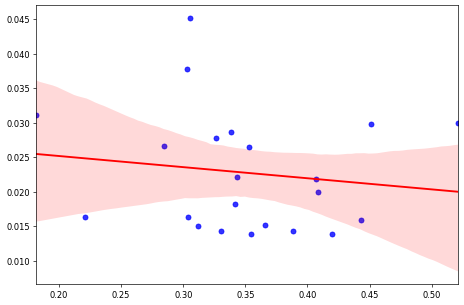

In [137]:
import seaborn as sns

fig = plt.figure(figsize=(20,80), dpi=60)
ax1 = fig.add_subplot(11,2,1)
sns.regplot(x=ICUM/HM, y=FM/CM,fit_reg=True,color='blue',line_kws={"color":"red"})
